`zepto_v2.csv`

In [ ]:
import pandas as pd, numpy as np, plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('zepto_v2.csv', encoding='cp1252')
colors = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#AF7AA1", "#FF9DA7", "#9C755F", "#BAB0AC", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"]

In [ ]:
print(df.max())
print(df.idxmax())
print(df.min())
print(df.idxmin())


In [ ]:
dfN = df.drop_duplicates(subset='name').copy()
dfN.info()

In [ ]:
labels = ['Category','name', 'mrp', 'discountPercent', 'availableQuantity', 'discountedSellingPrice', 'weightInGms', 'outOfStock', 'quantity']

In [ ]:
for value in labels:
    print(f'Unique in {value}: ', df[f'{value}'].unique(), 'with length of : ', len(df[f'{value}'].unique()))
    print()

In [ ]:
dfN

In [ ]:
fig = px.histogram(dfN, x='Category', color = 'Category', color_discrete_sequence=colors, template='plotly_dark')
# fig =
fig.show()

In [ ]:
fig = px.histogram(dfN, x='Category', barmode='group', color = 'outOfStock', color_discrete_sequence=['green','red'], template='plotly_dark')
# fig =
fig.show()

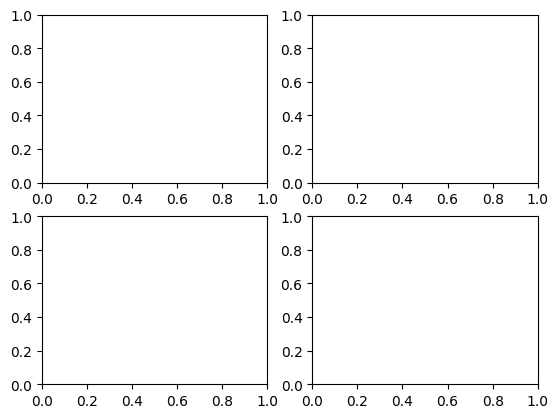

In [133]:
uniqueCategories = dfN['Category'].unique()
# fig = px.pie(dfN, names='outOfStock', color ='outOfStock', color_discrete_sequence=colors, template='plotly_dark')
# fig.show()

# plt.figure()
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)

for value in uniqueCategories:
    dfTemp = dfN[dfN['Category'] == f'{value}']
    figoutOfSt = px.pie(dfTemp, names='outOfStock', color_discrete_sequence=colors[n:n+1], template='plotly_dark', title=f'{value}')
    # figoutOfSt.show()
    # n+=1
# f.show()

In [ ]:
fig = px.pie(dfN, names='outOfStock', color ='outOfStock', color_discrete_sequence=colors, template='plotly_dark')
fig.show()

In [ ]:
fig = px.pie(dfN, names='availableQuantity', color = 'availableQuantity', color_discrete_sequence=colors, template='plotly_dark')
fig.show()

In [ ]:
fig = px.pie(dfN,names='discountPercent', color = 'discountPercent', color_discrete_sequence=colors, template='plotly_dark').update_traces(textposition='inside').update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [ ]:
from plotly.subplots import make_subplots

In [ ]:
dfCookingEssentials = df[df['Category'] == 'Cooking Essentials']
subFig = make_subplots(rows=1, cols=2)
dfTemp = dfCookingEssentials.sort_values(by='quantity', ascending = False).head(20)
fig1 = px.line(dfTemp, x='name', y = 'mrp',color_discrete_sequence=['red'])
fig2 = px.line(dfTemp, x='name', y = 'discountedSellingPrice', color_discrete_sequence=['green'])
subFig.add_trace(fig1.data[0])
subFig.add_trace(fig2.data[0])
subFig.update_traces(line={'width': 3}).update_layout(xaxis = {'tickmode': 'array','tickvals': list(range(20)),'ticktext':dfTemp['name'].str[:15]}).update_xaxes(visible=True, showticklabels=True).show()
dfTemp
